<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/supervised_learning/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC #Support vector machines

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) #Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1, random_state = 42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

#Nonlinear svm classification

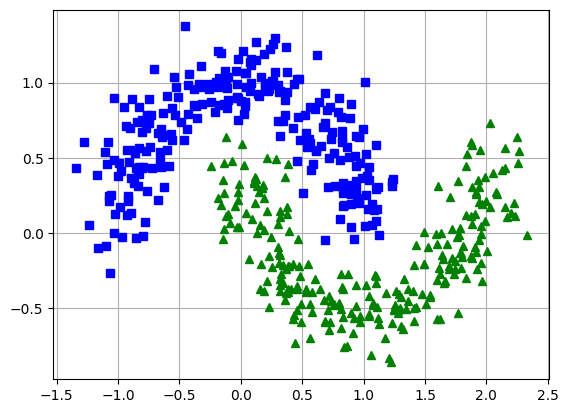

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 500, noise = 0.15, random_state = 42)

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.grid()
plt.show()

In [ ]:
svm_clf.fit(X, y)
svm_clf.score(X, y)

0.866

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3, include_bias = False),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 10_000, random_state = 42)
)

polynomial_svm_clf.fit(X, y)
polynomial_svm_clf.score(X, y)

1.0

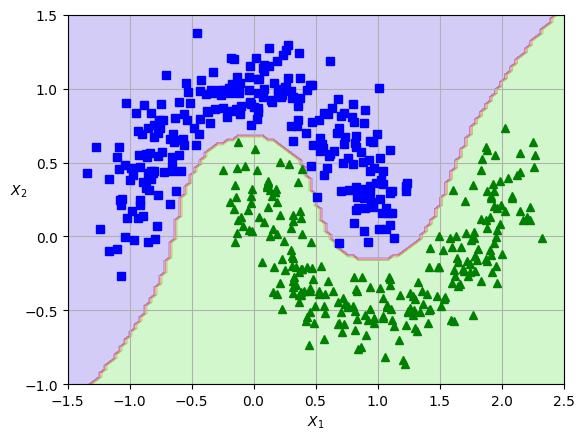

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$", rotation = 0)
    plt.show()

def plot_predictions(clf, axes = [-1.5, 2.5, -1, 1.5]):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [ ]:
#daha suretlidir
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

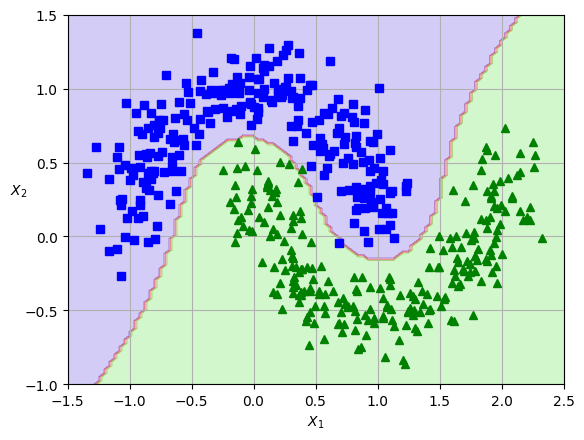

In [ ]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#SVR

In [ ]:
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 2 * X[:, 0] + np.random.randn(500)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR())
svm_reg.fit(X_train, y_train)
svm_reg.score(X_train, y_train)

0.6253027051094004

In [ ]:
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 2 * X[:, 0] + np.random.randn(500)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

svm_reg = make_pipeline(StandardScaler(),
                        SVR(kernel = "poly", degree = 3))
svm_reg.fit(X_train, y_train)
svm_reg.score(X_train, y_train)

0.5508458899829152

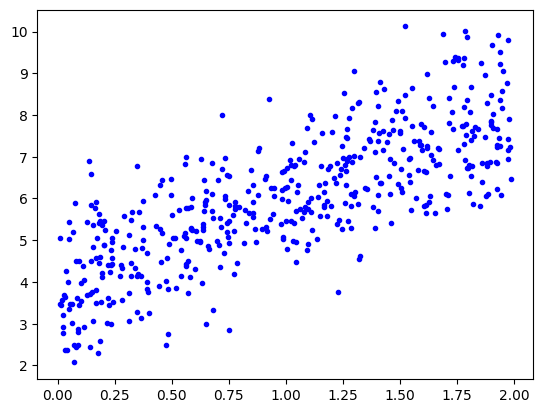

In [ ]:
plt.plot(X, y, "b.");